In [ ]:
install.packages("mlbench" , repos = "http://cran.us.r-project.org")
install.packages("DataExplorer" , repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
install.packages("moments", repos = "http://cran.us.r-project.org")
install.packages("pryr", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)
library(pryr)

In [3]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

In [4]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')

In [5]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))

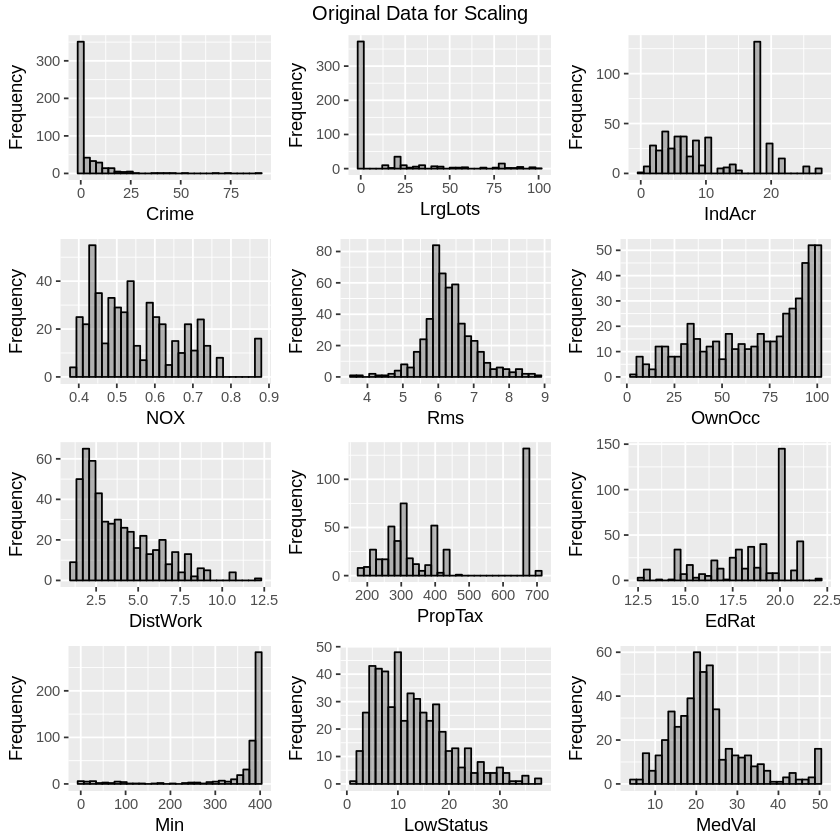

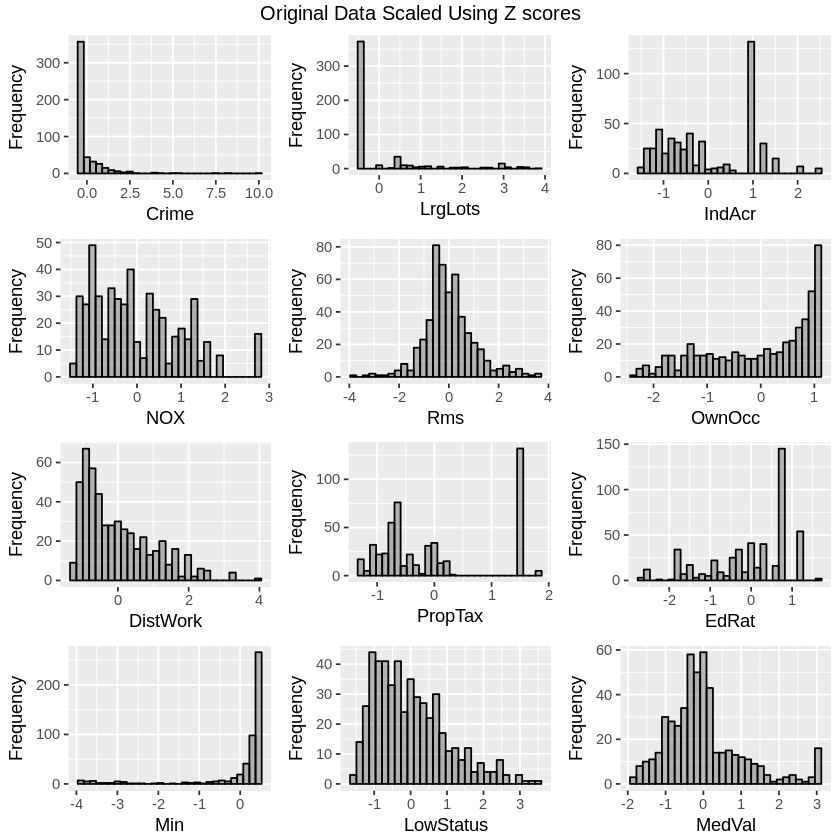

In [6]:
plot_histogram(BostonNum, title = 'Original Data for Scaling')
z <- scale(BostonNum, center = TRUE, scale = TRUE)
plot_histogram(z, title = 'Original Data Scaled Using Z scores')


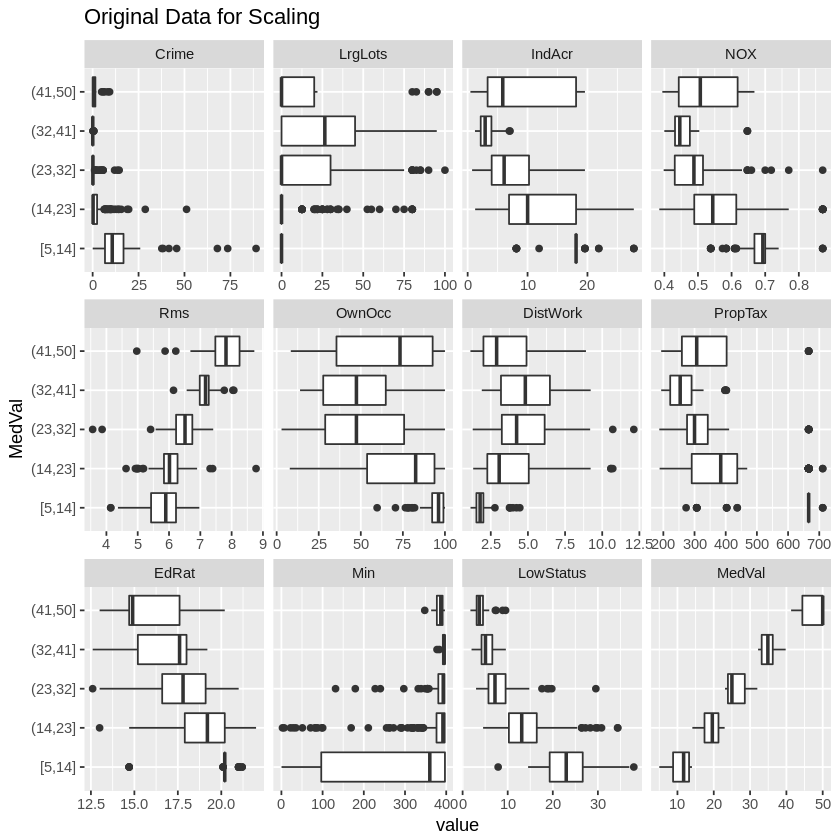

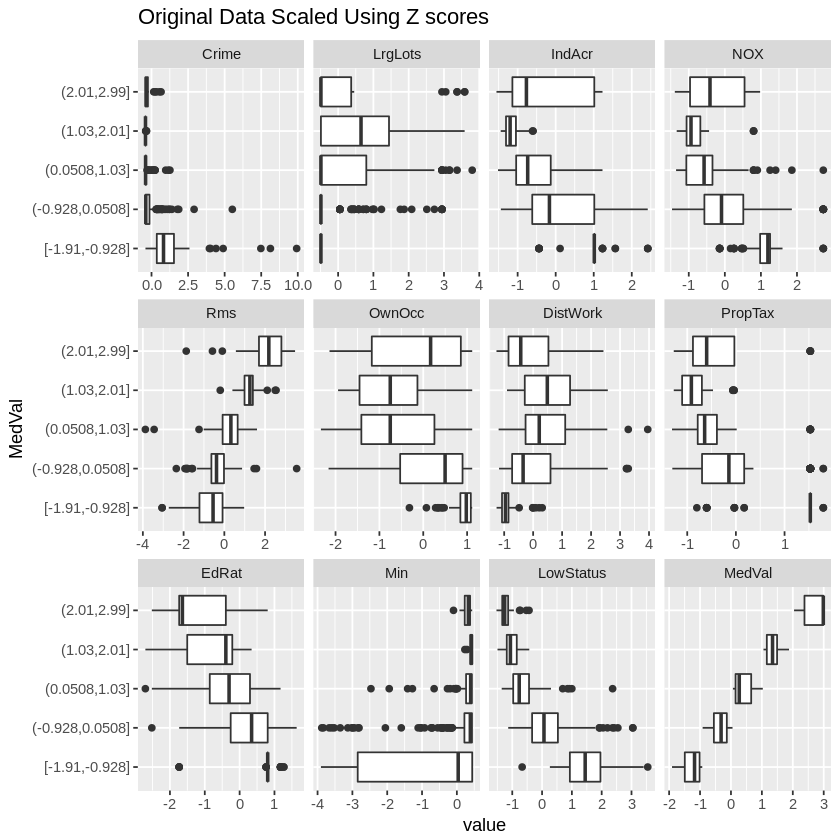

In [7]:
plot_boxplot(BostonNum, by = 'MedVal', title = 'Original Data for Scaling')
plot_boxplot(z, by = 'MedVal', title = 'Original Data Scaled Using Z scores')


In [8]:
BNumLog <- BostonNum
BNumLog[, 2][BNumLog[, 2] == 0] <- 0.1
BNumLog$LrgLots <- as.numeric(as.characte8r(BNumLog$LrgLots))
BLog <- log(BNumLog)
as_tibble(BLog)


Crime,LrgLots,IndAcr,NOX,Rms,OwnOcc,DistWork,PropTax,EdRat,Min,LowStatus,MedVal
-5.064036071,2.890372,0.8372475,-0.6198967,1.883275,4.177459,1.408545,5.690359,2.727853,5.983684,1.605430,3.178054
-3.600502343,-2.302585,1.9558605,-0.7571525,1.859574,4.368181,1.602836,5.488938,2.879198,5.983684,2.212660,3.072693
-3.601234944,-2.302585,1.9558605,-0.7571525,1.971996,4.112512,1.602836,5.488938,2.879198,5.973377,1.393766,3.546740
-3.430523211,-2.302585,0.7793249,-0.7808861,1.945624,3.824284,1.802073,5.402677,2.928524,5.977949,1.078410,3.508556
-2.672924399,-2.302585,0.7793249,-0.7808861,1.966693,3.992681,1.802073,5.402677,2.928524,5.983684,1.673351,3.589059
-3.511570439,-2.302585,0.7793249,-0.7808861,1.860975,4.072440,1.802073,5.402677,2.928524,5.976655,1.650580,3.356897
-2.427128428,2.525729,2.0630581,-0.6462636,1.793757,4.198705,1.715688,5.739793,2.721295,5.980404,2.520113,3.131137
-1.934129811,2.525729,2.0630581,-0.6462636,1.820023,4.565389,1.783475,5.739793,2.721295,5.983684,2.952303,3.299534
-1.554760351,2.525729,2.0630581,-0.6462636,1.728287,4.605170,1.805350,5.739793,2.721295,5.957468,3.398861,2.803360
-1.771721575,2.525729,2.0630581,-0.6462636,1.792426,4.453184,1.885872,5.739793,2.721295,5.957675,2.839078,2.939162


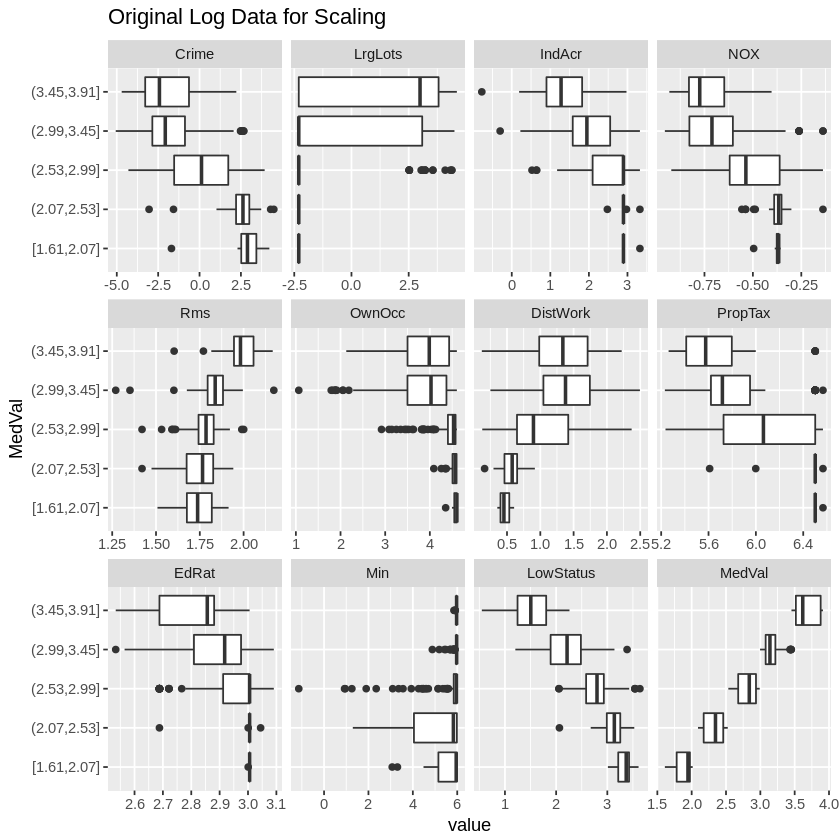

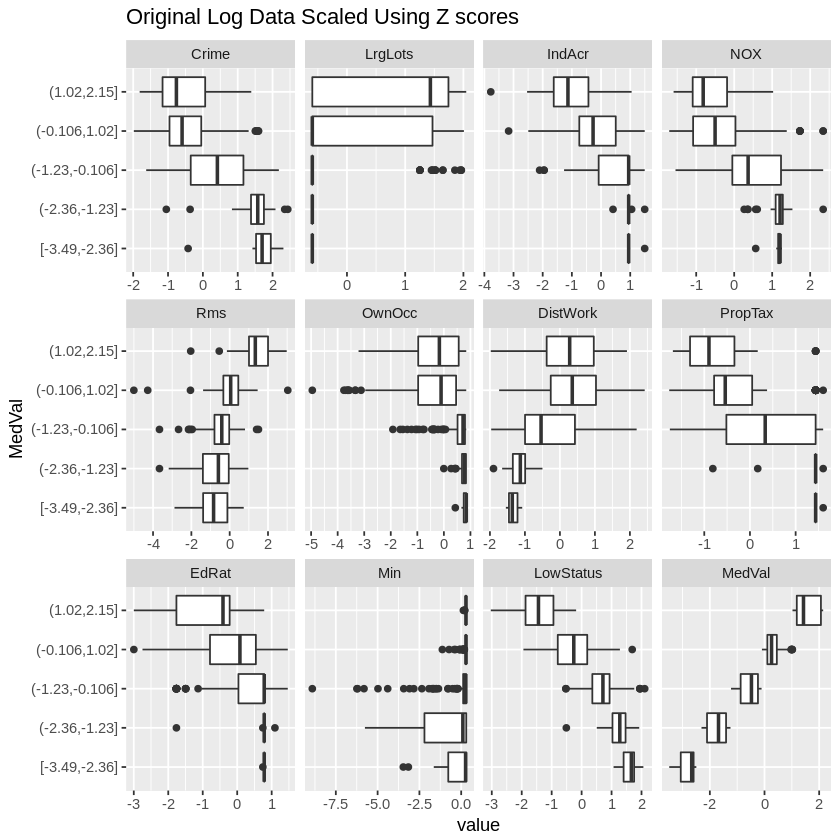

In [9]:
Zlog <- scale(BLog, center = TRUE, scale = TRUE)
plot_boxplot(BLog, by = 'MedVal', title = 'Original Log Data for Scaling')
plot_boxplot(Zlog, by = 'MedVal', title = 'Original Log Data Scaled Using Z scores')
